In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading the dataset into dataframe
df = pd.read_csv("WineQT.csv")

In [3]:
#printing first 5 rows to make sure data was loaded correctly
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Correlation Heatmap to Identify Top 3 Features Affecting Wine Quality

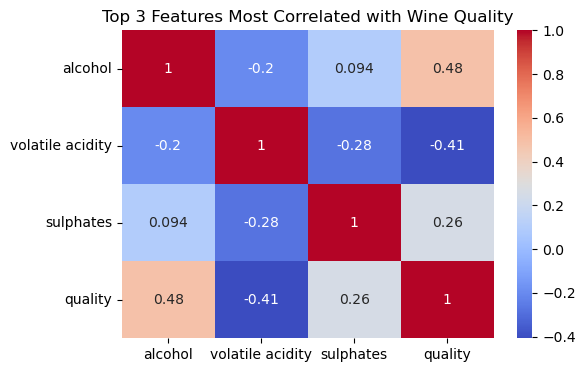

In [4]:
#creating dataframe to store dataset
df = pd.read_csv('WineQT.csv')

#computing the correlation matrix
corr = df.corr()
top_features = corr['quality'].drop('quality').abs().sort_values(ascending=False).head(3).index

#creating a heatmap for only those features and quality
plt.figure(figsize=(6, 4))
sns.heatmap(df[top_features.tolist() + ['quality']].corr(), annot=True, cmap='coolwarm')
plt.title('Top 3 Features Most Correlated with Wine Quality')
plt.show()

This heatmap visualized the correlations between wine quality and the three chemical features that have the strongest relationship with it. The correlation values range from negative correlation -1 to positive correlation 1. Features with correlations closer to 1 or -1 have the greatest impact. Positive correlations indicate that as the feature increases, wine quality tends to increase, whereas negative correlations indicate the opposite.

Bar Plots for Four Selected Attributes

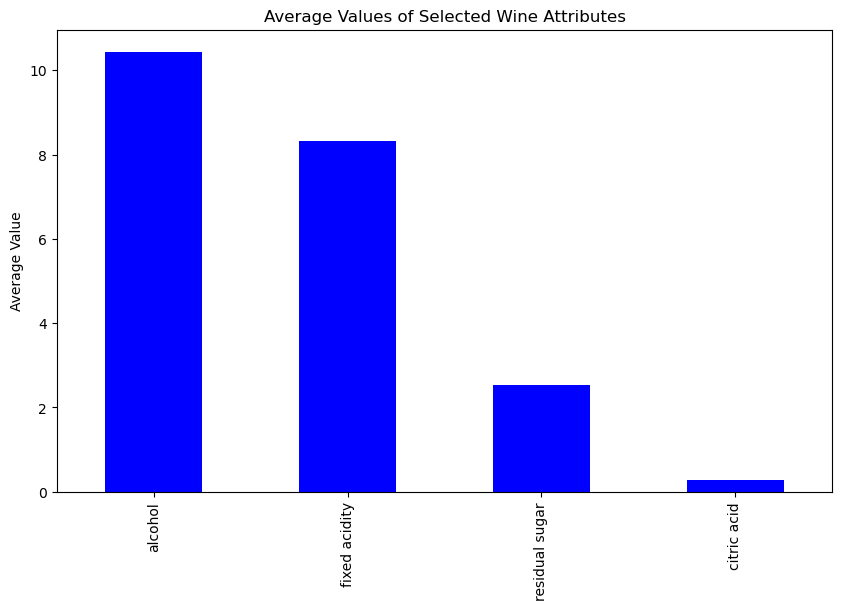

In [5]:
#selecting attributes
attributes = ["alcohol", "fixed acidity", "residual sugar", "citric acid"]

#plotting the average values of selected wine attributes as a bar chart
plt.figure(figsize=(10,6))
df[attributes].mean().plot(kind='bar', color='blue')
plt.ylabel("Average Value")
plt.title("Average Values of Selected Wine Attributes")
plt.show()

This bar plot shows the mean values of selected chemical attributes. It helps to quickly compare the typical levels of these chemicals in the dataset. For example, we can see that Alcohol and fixed acidity have higher average values compared to Residual Sugar and Citric Acid.

Line Plots for Four Selected Attributes

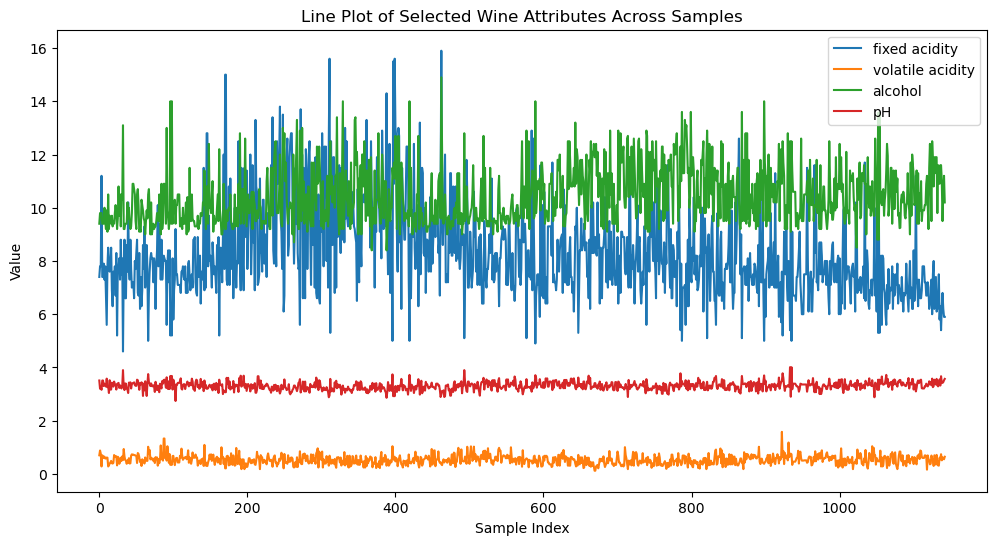

In [6]:
#selecting attributes
attributes = ['fixed acidity', 'volatile acidity', 'alcohol', 'pH']

#plotting each attribute
plt.figure(figsize=(12,6))
for attr in attributes:
    plt.plot(df.index, df[attr], label=attr)

#plot line plot
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Line Plot of Selected Wine Attributes Across Samples")
plt.legend()
plt.show()

This line plot shows how individual attributes vary across all wine sample. This is useful to observe trends or patterns in the context of chemical properties across the dataset. For example, we might see spikes in Volatile Acidity or Alcohol that could affect the wine quality.

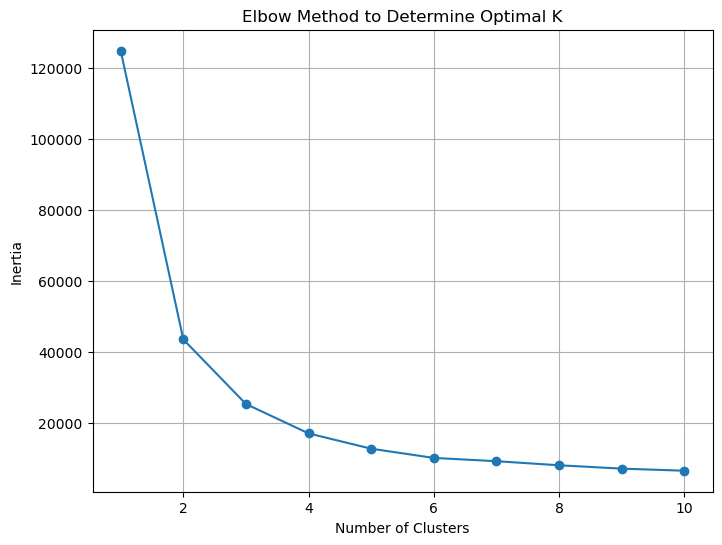

In [7]:
#selecting the features to use for clustering
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']
X = df[features]

#list to store inertia values for each K
inertia_scores = []
K_values = range(1, 11)

#loop through each K values, fir K-Means, and save the inertia
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

#plot the inertia vs number of clusters
plt.figure(figsize=(8,6))
plt.plot(K_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()


This figure shows how the number of clusters (K) affects model inertia. The rapid decrease in inertia levels off at the “elbow” point, which here is K = 4, indicating that the wines can be grouped into four distinct categories based on their chemical attributes.

In [8]:
#run K-Means with the chose optimal number of clusters and add cluster label
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k)
#assign each row to a cluster
df['Cluster'] = kmeans.fit_predict(X)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,3


The table shows a preview of the wines after applying K-Means clustering. Each wine is assigned a cluster label based on its chemical attributes, grouping similiar wines together. This helps us understand patterns in the data and identify wines with similiar characteristics.

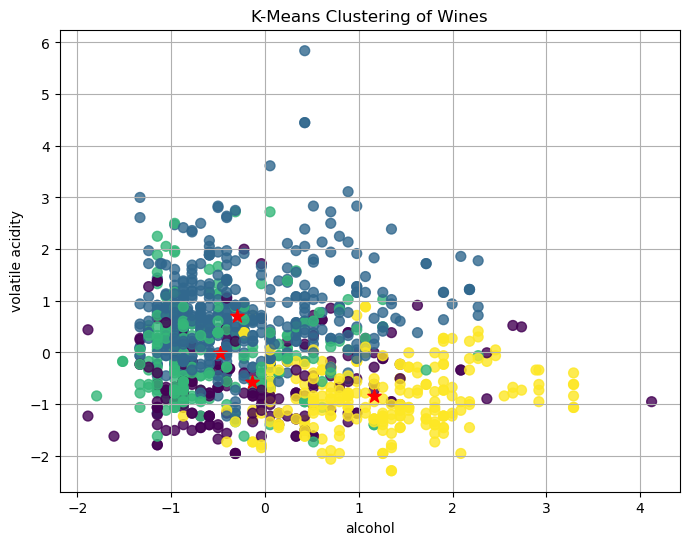

In [9]:
#selecting the features for clustering
features = ['alcohol', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'fixed acidity']
X = df[features].values

#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#running K-Means with the number of clusters determined of k=4
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X_scaled)

# Ploting the clusters using the first two features for visualization
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, marker='*', label='Centers')

#label axes with real feature names
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-Means Clustering of Wines')
plt.grid(True)
plt.show()

This scatter plot shows how the wines are grouped into different clusters (price categories) based on their chemical properties. Each color represents a cluster, Wines with higher alcohol and lower volatile acidity are grouped together, which suggest that they most likely belong to higher price categories.

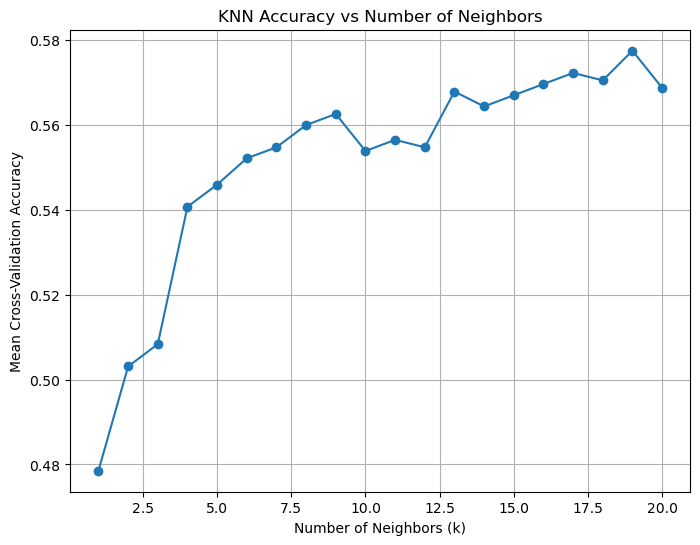

In [10]:
#selecting features and target
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']

X = df[features]
#predicting quality
y = df['quality'] 

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#test k values from 1 to 20
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())

#plot results
plt.figure(figsize=(8,6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("KNN Accuracy vs Number of Neighbors")
plt.grid(True)
plt.show()

The plot shows the K-NN model accuracy for different values of k. The peak around 19 shows us the optimal number of neighbors, meaning the model predicts wine quality most reliably by considering the 19 most similar wines.